In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('train_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.shape

(614, 13)

In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Loan_ID'].nunique()

614

In [8]:
# Dropping the Loan ID colums since all 614 values are unique

data.drop(columns='Loan_ID', axis =1, inplace = True)

### Handling Missing Values

In [9]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

In [11]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
data['Married'].fillna(data['Married'].mode()[0], inplace = True)

In [13]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [14]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)

In [15]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)

In [17]:
miss_num_feat = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

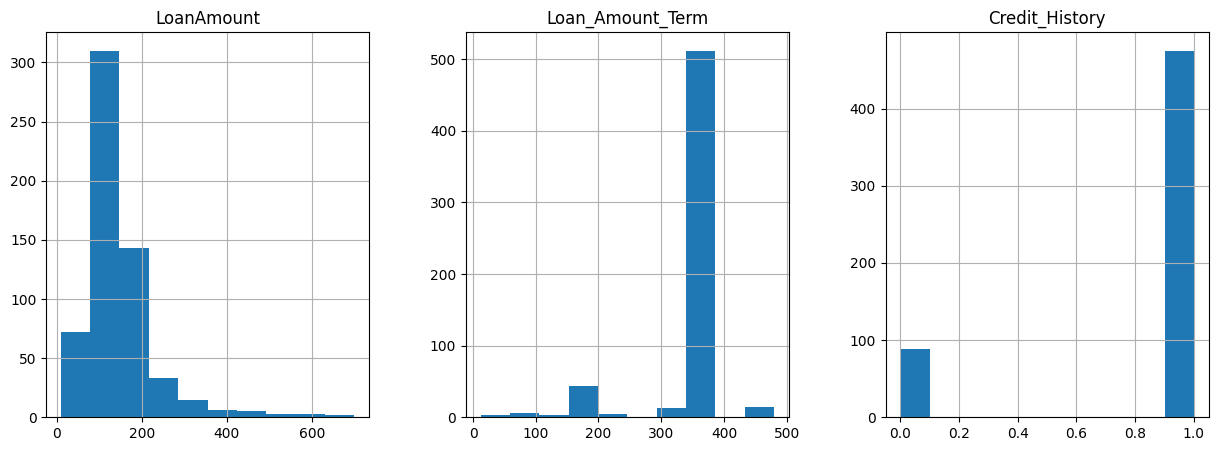

In [18]:
fig, axis = plt.subplots(1,3, figsize =(15,5))
data.hist(ax = axis, column=miss_num_feat)
plt.show();

In [19]:
# Filling Loan Amount Missing values with Median 

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [20]:
# Filling Loan Amount Term and Credit History missing values with mode

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)


In [21]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Encoding

In [22]:
# Mapping Target Feature Values to 0 and 1

map_loan_status  = {'Y': 1, 'N' : 0}
data['Loan_Status'] = data['Loan_Status'].map(map_loan_status).astype(int)

In [23]:
data['Dependents'].replace('3+', 3, inplace=True)

In [24]:
# Splitting Target and Independent Features

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [25]:
# Encoding the rest of Categorical Features

X = pd.get_dummies(X)

In [26]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decison Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
Tree = DecisionTreeClassifier(random_state=42)

In [30]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = Tree.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred))

0.6972972972972973


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfmodel = RandomForestClassifier(n_estimators=500, random_state=42)

In [35]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [36]:
rf_y_pred = rfmodel.predict(X_test)

In [37]:
print(accuracy_score(y_test, rf_y_pred))

0.7675675675675676


In [38]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.43      0.57        65
           1       0.75      0.95      0.84       120

    accuracy                           0.77       185
   macro avg       0.79      0.69      0.70       185
weighted avg       0.78      0.77      0.74       185



## Ensemble Bagging with Decision Tree as base model

In [39]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator = tree, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_clf = bagging_clf.predict(X_test)
accuracy_score(y_pred_clf, y_test)


0.7351351351351352

### Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf =  GradientBoostingClassifier(n_estimators=100,  max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.7513513513513513

## Adaptive Boosting

In [41]:
from  sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(n_estimators=100, random_state=42)

In [42]:
ADB.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [43]:
ADB_y_pred = ADB.predict(X_test)

In [45]:
accuracy_score(y_test, ADB_y_pred)

0.7783783783783784

In [46]:
print(classification_report(y_test, ADB_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61        65
           1       0.77      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.78      0.78      0.76       185



From the above models, Adaptive Boosting Classifier gives a better model